In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split 

In [2]:
data = pd.read_csv('./Aqua.csv')
data.head()

,DO,pH,Temperature,Ammonia,Nitrite Nitrogen,Carbon Dioxide,Salinity,Health
0,3.8,8.7,26,0.9,1,5.7,15.4,1
1,3.5,8.2,28,0.6,1,6.5,18.4,0
2,3.9,7.4,30,0.6,1,6.4,23.7,1
3,3.7,8.6,27,1.0,1,3.0,22.8,1
4,5.8,7.9,26,0.5,1,4.8,17.8,0


In [3]:
Y=data.iloc[:,7].values
print(Y)

[1 0 1 ... 1 0 1]


In [4]:
X=data
del data[data.columns[-1]]
X

,DO,pH,Temperature,Ammonia,Nitrite Nitrogen,Carbon Dioxide,Salinity
0,3.8,8.7,26,0.9,1,5.7,15.4
1,3.5,8.2,28,0.6,1,6.5,18.4
2,3.9,7.4,30,0.6,1,6.4,23.7
3,3.7,8.6,27,1.0,1,3.0,22.8
4,5.8,7.9,26,0.5,1,4.8,17.8
...,...,...,...,...,...,...,...
6287,3.1,5.9,27,0.9,1,7.3,12.8
6288,3.6,8.6,43,0.7,1,18.9,11.0
6289,3.8,7.6,31,0.4,1,7.2,22.9
6290,4.6,11.9,26,0.6,1,3.9,21.8


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)
Y

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

78.8135593220339


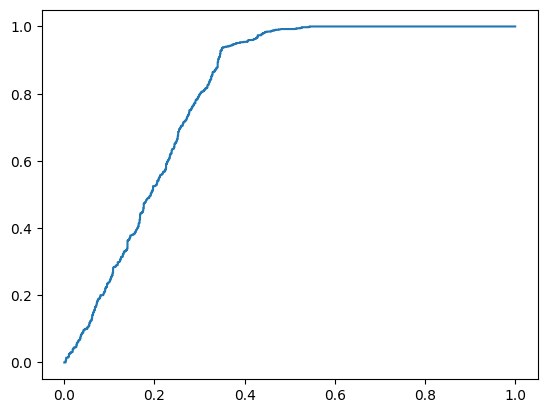

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
model = AdaBoostClassifier(n_estimators=99,learning_rate=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
ada_acc=accuracy_score(Y_test,Y_pred)*100
print(ada_acc)
# plot_confusion_matrix(model, X_test, Y_test) 

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()


# # Custom Input 1
# features = np.array([[200000,20993.0,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,1,3,1.0,3,1,3]])
# Y_pred=model.predict(features)
# if(Y_pred == 1):
#     print("Person is likely to buy the package")
# else:
#     print("Person is less likely to buy the package")

# # Custom Input 2    
# features = np.array([[200001,20130.0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,0,3,2.0,3,2,3]])
# Y_pred=model.predict(features)
# if(Y_pred == 1):
#     print("Person is likely to buy the package")
# else:
#     print("Person is less likely to buy the package")


(4404, 7)
[1 1 1 ... 0 1 0]
59.79872881355932


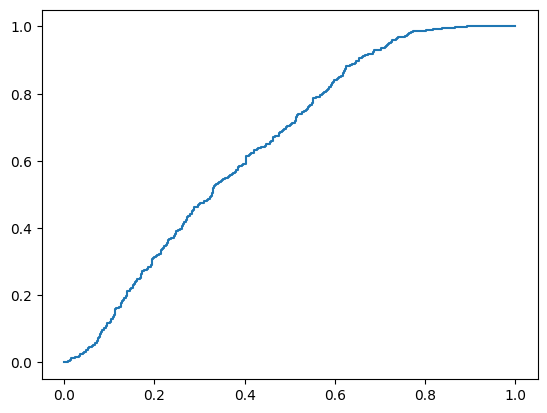

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,Y_train)
print(X_train.shape)
Y_pred=model.predict(X_test)
print(Y_pred)
Logi_acc=accuracy_score(Y_test,Y_pred)*100
print(Logi_acc)

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()


[1 1 0 ... 0 1 1]


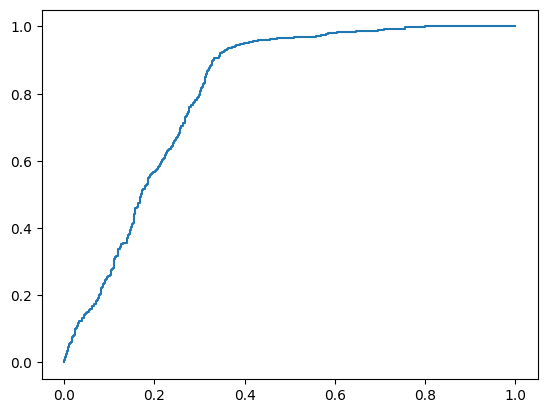

In [19]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,Y_train)
# print(X_test[1])
# print(X_test)
# print(X_test[0].reshape(1,-1))

Y_pred= model.predict(X_test)
print(Y_pred)
NB_acc=accuracy_score(Y_test,Y_pred)*100
NB_acc

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()


[1 0 1 ... 1 0 1]
[1 1 0 ... 0 1 1]
[1 1 0 ... 0 1 1]
[1 1 0 ... 0 1 1]
(4404, 7)
[1 1 1 ... 0 1 0]
59.79872881355932
78.8135593220339
[1 1 0 ... 0 1 1]


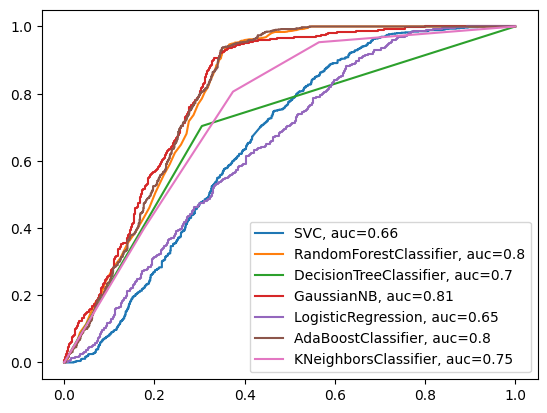

In [30]:
#SVM
from sklearn.svm import SVC
model=SVC(kernel="linear",probability=True)  #sometimes kernal= poly or "rbf"
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y)
SVC_acc=accuracy_score(Y_test,Y_pred)*100
SVC_acc

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="SVC, auc="+str(auc))


#RandomForest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y_pred)
RandFor_acc=accuracy_score(Y_test,Y_pred)*100
RandFor_acc

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))


#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y_pred)
DeciTr_acc=accuracy_score(Y_test,Y_pred)*100
DeciTr_acc


y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc))



#Naive bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,Y_train)
# print(X_test[1])
# print(X_test)
# print(X_test[0].reshape(1,-1))

Y_pred= model.predict(X_test)
print(Y_pred)
NB_acc=accuracy_score(Y_test,Y_pred)*100
NB_acc

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="GaussianNB, auc="+str(auc))




from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,Y_train)
print(X_train.shape)
Y_pred=model.predict(X_test)
print(Y_pred)
Logi_acc=accuracy_score(Y_test,Y_pred)*100
print(Logi_acc)

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))




from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
model = AdaBoostClassifier(n_estimators=99,learning_rate=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
ada_acc=accuracy_score(Y_test,Y_pred)*100
print(ada_acc)
# plot_confusion_matrix(model, X_test, Y_test) 

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="AdaBoostClassifier, auc="+str(auc))




#KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(Y_pred)
KNN_acc=accuracy_score(Y_test,Y_pred)*100
KNN_acc


y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(Y_test, y_pred_proba),2)
plt.plot(fpr,tpr,label="KNeighborsClassifier, auc="+str(auc))
plt.legend(loc=4)
plt.show()


[1 1 0 ... 0 1 1]


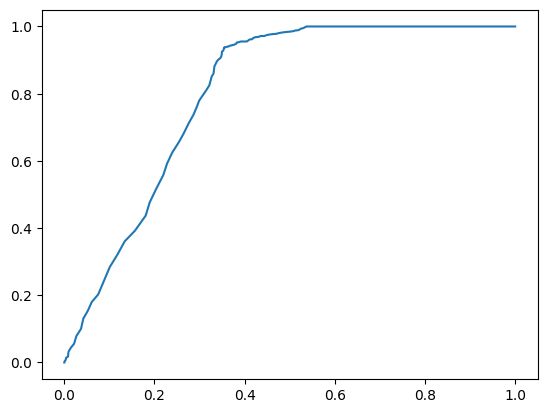

In [21]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y_pred)
RandFor_acc=accuracy_score(Y_test,Y_pred)*100
RandFor_acc

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))



[1 1 0 ... 0 1 1]


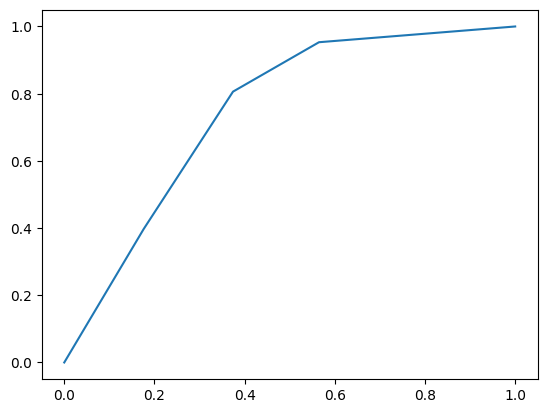

In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(Y_pred)
KNN_acc=accuracy_score(Y_test,Y_pred)*100
KNN_acc


y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))



[1 1 0 ... 0 1 1]


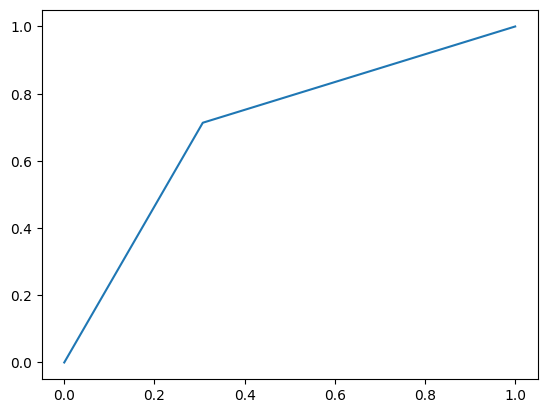

In [23]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y_pred)
DeciTr_acc=accuracy_score(Y_test,Y_pred)*100
DeciTr_acc


y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


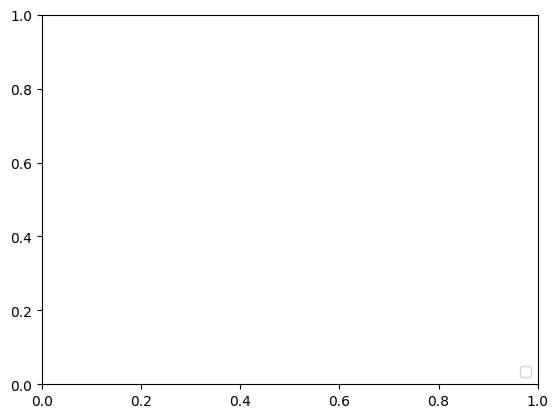

In [24]:
# Ada = AdaBoostClassifier(n_estimators=99,learning_rate=1)
# Ada.fit(X_train,Y_train)
# LogisticRegression=LogisticRegression()
# LogisticRegression.fit(X_train,Y_train)
# Gaussian= GaussianNB()
# Gaussian.fit(X_train,Y_train)
# SVC=SVC(kernel="linear",probability=True)  #sometimes kernal= poly or "rbf"
# SVC.fit(X_train,Y_train)
# RandomForestClassifier=RandomForestClassifier(n_estimators=100)
# RandomForestClassifier.fit(X_train,Y_train)
# KNeighborsClassifier=KNeighborsClassifier(n_neighbors=3)
# KNeighborsClassifier.fit(X_train,Y_train)
# DecisionTreeClassifier=DecisionTreeClassifier()
# DecisionTreeClassifier.fit(X_train,Y_train)
plt.legend(loc=4)
plt.show()

In [16]:
from scikitplot.metrics import plot_roc_curve
disp=plot_roc_curve(Ada,X_test,Y_test)

NameError: name 'Ada' is not defined

In [ ]:
# all models with accuracy score

models=pd.DataFrame({'Models':['Logistic Regression','KNeighbor Classifier','GaussianNB','Supprt Vectro Machine','Random-Forest Classifier','DecisionTreeClassifier'],
                     'Accuracy score':[Logi_acc,KNN_acc,NB_acc,SVC_acc,RandFor_acc,DeciTr_acc]})
models.sort_values(by="Accuracy score",ascending=False)

In [ ]:
# Custom Input 1
features = np.array([[3.2,6.4,30,0.2,1,3.3,12.9]])
Y_pred=model.predict(features)
if(Y_pred == 1):
    print("Health is Good!!")
else:
    print("Health is not good!!!")


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Z=X.iloc[:,5]
Z

In [ ]:
# plt.scatter(Z, Y)

In [ ]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred[3]

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred)
auc = metrics.roc_auc_score(Y_test, y_pred)

In [ ]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()